In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import math
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance

In [3]:
#Read preprocessed dataframe
df = pd.read_csv("df_200d.csv")
N=1
df = df.iloc[: , N:]
df.drop(["label"],axis=1,inplace=True)


In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000383,0.000158,-0.000949,0.000490,0.000481,-0.000549,-0.000422,0.000336,0.000962,-0.000839,...,0.000947,-0.000078,-0.000327,0.000401,-0.000929,-0.000909,-0.000839,0.000481,-0.000554,-0.000584
1,0.081156,0.012583,0.065316,-0.048686,0.020118,0.000674,0.011840,0.010894,-0.011872,0.091399,...,0.075309,-0.004857,-0.013718,-0.104003,0.024765,-0.018291,0.029533,-0.033234,0.000034,0.010331
2,0.076357,0.042269,0.053119,0.071835,0.035375,-0.043499,0.042177,0.074387,0.079184,-0.004334,...,0.070950,-0.068703,0.012759,-0.031691,0.002141,-0.008097,-0.043607,-0.022737,0.024094,-0.021620
3,0.038704,0.027904,-0.016752,0.038551,0.041829,-0.047390,-0.000527,0.024806,0.054844,-0.029237,...,-0.005371,-0.035112,-0.021413,-0.025157,0.053274,-0.092598,-0.034449,0.005724,0.035747,-0.027550
4,-0.049901,-0.040428,-0.066080,0.037030,0.022905,-0.027634,-0.019163,0.024063,-0.028400,-0.077838,...,-0.064076,0.005548,-0.045239,0.031684,0.017676,-0.052134,-0.032271,-0.062767,0.007405,-0.000203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,-0.004407,0.018456,0.043369,0.018183,-0.027887,0.030340,-0.025458,-0.044957,-0.000312,0.048930,...,0.004720,-0.007437,0.024643,-0.010980,-0.018035,0.015552,0.021212,0.037732,-0.019713,0.000696
41153,-0.017312,0.028210,0.006507,0.034850,0.009177,0.008197,0.005125,-0.024672,0.054517,0.020559,...,0.042758,-0.030506,0.028372,-0.000251,0.001942,-0.001618,-0.004993,0.021229,0.013495,-0.001879
41154,0.054986,0.021449,0.023218,0.054681,0.009859,-0.032599,0.027852,0.024607,0.055449,-0.003388,...,0.046979,-0.000470,-0.016184,-0.023404,0.029444,-0.021759,-0.012471,-0.020309,-0.017386,0.017886
41155,-0.004300,0.020211,-0.004238,0.041605,-0.018409,0.008723,0.029796,-0.004575,0.019410,-0.017640,...,0.018462,-0.025074,-0.011748,0.018829,0.031300,-0.010846,-0.016540,-0.003366,0.021439,-0.026697


In [5]:
X = df.to_numpy()
X
X.shape[0] #number of instances
X.shape[1] #number of attributes

200

In [20]:
#Number of clusters, number of iterations and early stopping need to be specified beforehand. 
#Number of clusters k 
k  = 5

#Number if iterations till convergence n_iter
n_iter = 15

In [7]:
#Initialize k random centroides. Centroids can not be inizialized on the same point.
def inizialize_centroids(X, k):
    centroids=[] #array with positions of centroids
    temp = []
    i = 0
    while i < k:
        rand = random.randrange(0,X.shape[0]-1) #get an integer between 0 and number of instances
        if rand in temp:
            continue
        else:
            print(f"Points chosen for cluster initialization {rand}") #an instance has been chosen as a centroid
            temp.append(rand) #add that instance to temp to not repeat the same position as centroid
            centroids.append(X[rand]) #add that instance to the centroid
            i = i+1
    return centroids

In [8]:
def assign_cluster(X, centroids, k):
    # Create list of points which are appointed to each cluster
    clusters = [[] for _ in range(k)]

    # Loop through all instances and determine the closest cluster
    for i, j in enumerate(X): 
        closest_centroid = np.argmin(np.sqrt(np.sum((j - centroids) ** 2, axis=1))) #search for the closest distance to a centroid for each instance
        clusters[closest_centroid].append(i) #once we find the closest centroid, append the instance to that centroid's cluster
    return clusters

In [9]:
def determine_new_centroids(k, clusters, X): #once all clusters are determinated, we must recalculate the centroids.
    centroids = np.zeros((k, X.shape[1])) #numpy.zeros creates an array filled with 0s, with the shape of k.

    for i, j in enumerate(clusters): #loops through all clusters
        new_centroid = np.mean(X[j], axis=0) #calculates the mean distance between the instances and centroid of each cluster
        centroids[i] = new_centroid #for each clusters assigns the new centroid
    return centroids

In [10]:
def predict_cluster(clusters, X):
    y_pred = np.zeros(X.shape[0]) #create  x=(number of instances) arrays full of 0s

    for i, j in enumerate(clusters):
        for k in j:
            y_pred[k] = i

    return y_pred

In [11]:
def plot_fig(X, y_pred, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap=plt.cm.RdYlGn)
    plt.scatter(centroids[:, 0], centroids[:,1], s=250, marker='*', c='red', edgecolor='black')
    plt.show()

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(df)
tsne_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 41157 samples in 0.464s...
[t-SNE] Computed neighbors for 41157 samples in 548.946s...
[t-SNE] Computed conditional probabilities for sample 1000 / 41157
[t-SNE] Computed conditional probabilities for sample 2000 / 41157
[t-SNE] Computed conditional probabilities for sample 3000 / 41157
[t-SNE] Computed conditional probabilities for sample 4000 / 41157
[t-SNE] Computed conditional probabilities for sample 5000 / 41157
[t-SNE] Computed conditional probabilities for sample 6000 / 41157
[t-SNE] Computed conditional probabilities for sample 7000 / 41157
[t-SNE] Computed conditional probabilities for sample 8000 / 41157
[t-SNE] Computed conditional probabilities for sample 9000 / 41157
[t-SNE] Computed conditional probabilities for sample 10000 / 41157
[t-SNE] Computed conditional probabilities for sample 11000 / 41157
[t-SNE] Computed conditional probabilities for sample 12000 / 41157
[t-SNE] Computed conditional probabilities for 

array([[ -6.429745 ,  14.535929 ],
       [ 11.103397 ,   1.2193952],
       [  5.894697 , -20.719992 ],
       ...,
       [  5.3250957,  -4.6587124],
       [  0.4277476,   6.2922106],
       [-17.089993 ,   3.2118745]], dtype=float32)

Points chosen for cluster initialization 38279
Points chosen for cluster initialization 24625
Points chosen for cluster initialization 9811
Points chosen for cluster initialization 38529
Points chosen for cluster initialization 12082
Current iteration 0
Current iteration 1
Current iteration 2
Current iteration 3
Current iteration 4
Current iteration 5
Current iteration 6
Current iteration 7
Current iteration 8
Current iteration 9
Current iteration 10
Current iteration 11
Current iteration 12
Current iteration 13
Current iteration 14


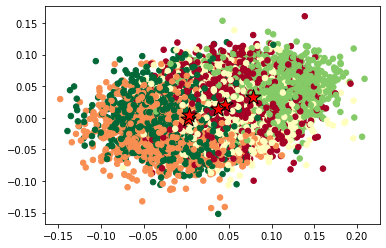

0.0

In [62]:
centroids = inizialize_centroids(X, k)

for i in range(n_iter):
    print(f"Current iteration {i}")
    clusters = assign_cluster(X, centroids, k)
    prev_centroids = centroids
    centroids = determine_new_centroids(k, clusters, X)

    diff = centroids - prev_centroids
    
    if not diff.any():
        print(f"Termination criterion satisfied in iteration {i}")
        break

# Get label predictions
y_pred = predict_cluster(clusters, X)

plot_fig(X, y_pred, centroids)
#plot_fig(tsne_results, y_pred, centroids) 
dunn_index(X, centroids, clusters)

In [61]:
def dunn_index(X, centroids, clusters):
    index = 0
    distance = 0
    inter_cluster_distance = 999999
    intra_cluster_distance = 0
    current_centroid = []
    to_use_centroids = centroids
    to_use_centroids = to_use_centroids.tolist()
    for i in centroids: #find the smallest distance between centroids
        current_centroid = i
        to_use_centroids.pop()
        for j in to_use_centroids: 
            distance = np.linalg.norm(current_centroid-j)
            if distance < inter_cluster_distance:
                inter_cluster_distance = distance
                
      
    cluster = [] 
    for i in range(k):  #find the largest distance between any instance and the centroid of it's cluster
        cluster = clusters[i]
        centroid = centroids[i]
        for instance in cluster:
            distance = np.linalg.norm(instance-centroid)
            if distance > intra_cluster_distance:
                intra_cluster_distance = distance

    index = inter_cluster_distance / intra_cluster_distance 
    
    return index